### Hey there! In this notebook, we are going to build and test some ML models using different algorithms. We're using a credit risk dataset, which can be found in the file itself.

**LOADING THE DATA**

In [153]:
import pandas as pd
import numpy as np

In [154]:
pd.set_option('display.max_columns', 20)
df = pd.read_csv('clean_data.csv').drop(['ID'],axis=1)
df

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,0,0,0,0,0,2,20,180000.0,56.400884,0.542106,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers,1
9705,0,0,1,1,1,0,0,0,2,19,112500.0,43.360233,7.375921,Commercial associate,Secondary / secondary special,Married,House / apartment,Other,1
9706,1,1,1,0,0,0,0,0,2,21,90000.0,52.296762,4.711938,Working,Secondary / secondary special,Married,House / apartment,Other,1
9707,0,0,1,0,1,1,0,0,2,32,157500.0,33.914454,3.627727,Pensioner,Higher education,Married,House / apartment,Medicine staff,1


**DATA PREPROCESSING**

In [155]:
df.columns

Index(['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email',
       'Unemployed', 'Num_children', 'Num_family', 'Account_length',
       'Total_income', 'Age', 'Years_employed', 'Income_type',
       'Education_type', 'Family_status', 'Housing_type', 'Occupation_type',
       'Target'],
      dtype='object')

In [156]:
df = pd.get_dummies(df,columns=['Income_type',
       'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']).replace({True:1,False:0})

In [157]:
df

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,...,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff
0,1,1,1,1,0,0,0,0,2,15,...,0,0,0,1,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,2,29,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,1,1,0,0,1,4,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,1,0,1,20,...,0,0,0,1,0,0,0,0,0,0
4,1,1,1,1,1,1,0,0,2,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,0,0,0,0,0,2,20,...,0,0,0,0,0,0,0,0,0,0
9705,0,0,1,1,1,0,0,0,2,19,...,0,0,0,1,0,0,0,0,0,0
9706,1,1,1,0,0,0,0,0,2,21,...,0,0,0,1,0,0,0,0,0,0
9707,0,0,1,0,1,1,0,0,2,32,...,0,0,1,0,0,0,0,0,0,0


In [158]:
df.isna().sum()

Gender                                          0
Own_car                                         0
Own_property                                    0
Work_phone                                      0
Phone                                           0
Email                                           0
Unemployed                                      0
Num_children                                    0
Num_family                                      0
Account_length                                  0
Total_income                                    0
Age                                             0
Years_employed                                  0
Target                                          0
Income_type_Commercial associate                0
Income_type_Pensioner                           0
Income_type_State servant                       0
Income_type_Student                             0
Income_type_Working                             0
Education_type_Academic degree                  0


In [159]:
df.columns

Index(['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email',
       'Unemployed', 'Num_children', 'Num_family', 'Account_length',
       'Total_income', 'Age', 'Years_employed', 'Target',
       'Income_type_Commercial associate', 'Income_type_Pensioner',
       'Income_type_State servant', 'Income_type_Student',
       'Income_type_Working', 'Education_type_Academic degree',
       'Education_type_Higher education', 'Education_type_Incomplete higher',
       'Education_type_Lower secondary',
       'Education_type_Secondary / secondary special',
       'Family_status_Civil marriage', 'Family_status_Married',
       'Family_status_Separated', 'Family_status_Single / not married',
       'Family_status_Widow', 'Housing_type_Co-op apartment',
       'Housing_type_House / apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment',
       'Housing_type_With parents', 'Occupation_type_Accountants',
       'Occupatio

In [160]:
input_cols = ['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email',
       'Unemployed', 'Num_children', 'Num_family', 'Account_length',
       'Total_income', 'Age', 'Years_employed',
       'Income_type_Commercial associate', 'Income_type_Pensioner',
       'Income_type_State servant', 'Income_type_Student',
       'Income_type_Working', 'Education_type_Academic degree',
       'Education_type_Higher education', 'Education_type_Incomplete higher',
       'Education_type_Lower secondary',
       'Education_type_Secondary / secondary special',
       'Family_status_Civil marriage', 'Family_status_Married',
       'Family_status_Separated', 'Family_status_Single / not married',
       'Family_status_Widow', 'Housing_type_Co-op apartment',
       'Housing_type_House / apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment',
       'Housing_type_With parents', 'Occupation_type_Accountants',
       'Occupation_type_Cleaning staff', 'Occupation_type_Cooking staff',
       'Occupation_type_Core staff', 'Occupation_type_Drivers',
       'Occupation_type_HR staff', 'Occupation_type_High skill tech staff',
       'Occupation_type_IT staff', 'Occupation_type_Laborers',
       'Occupation_type_Low-skill Laborers', 'Occupation_type_Managers',
       'Occupation_type_Medicine staff', 'Occupation_type_Other',
       'Occupation_type_Private service staff',
       'Occupation_type_Realty agents', 'Occupation_type_Sales staff',
       'Occupation_type_Secretaries', 'Occupation_type_Security staff',
       'Occupation_type_Waiters/barmen staff']
target_col = ['Target']

In [161]:
X = df[input_cols]
y = df[target_col]

In [162]:
from sklearn.preprocessing import MinMaxScaler

In [163]:
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [164]:
X = scaler.transform(X)

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [167]:
X_train = pd.DataFrame(X_train,columns=input_cols)
X_test = pd.DataFrame(X_test,columns=input_cols)

### Calculating RMSE, MAE and MSE.

In [168]:
#RMSE
def rmse(x,y):
    return np.sqrt(np.mean(np.square(x-y)))

#MAE
def mae(x,y):
    return np.mean(np.sqrt((x-y)**2))

#MSE
def mse(x,y):
    return np.mean(np.square(x-y))

Now, let's build and test the model with different ML algorithms.

### RANDOM FOREST

In [169]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
model = RandomForestClassifier(n_jobs=-1,random_state=42)

In [171]:
model.fit(X_train,y_train)

<ipython-input-171-b7a8c64777c1>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [172]:
model.score(X_test,y_test)

0.8554365733113674

In [173]:
preds = model.predict(X_test)

#Reshaping array sizes
a = np.reshape(preds, (2428,1))
b = np.reshape(y_test, (2428,1))

In [174]:
#RMSE, MAE, MSE

s = rmse(a,b), mae(a,b), mse(a,b)
s

(0.38021497430878837, 0.14456342668863262, 0.14456342668863262)

### LOGISTIC REGRESSION

In [175]:
from sklearn.linear_model import LogisticRegression

In [176]:
model1 = LogisticRegression(n_jobs=-1)
model1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(n_jobs=-1)

In [177]:
model1.score(X_test,y_test)

0.857495881383855

In [178]:
preds1= model1.predict(X_test)

#Reshaping array sizes
a = np.reshape(preds1, (2428,1))
b = np.reshape(y_test, (2428,1))

In [179]:
#RMSE, MAE, MSE

s1 = rmse(a,b), mae(a,b), mse(a,b)
s1

(0.37749717696447077, 0.14250411861614498, 0.14250411861614498)

### DECISION TREE CLASSIFICATION


In [180]:
from sklearn.tree import DecisionTreeClassifier

In [181]:
model2 = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=2**5,class_weight={0:2,1:1})
model2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 2, 1: 1}, max_depth=5,
                       max_leaf_nodes=32)

In [182]:
model2.score(X_test,y_test)

0.8542009884678748

In [183]:
preds2= model2.predict(X_test)

#Reshaping array sizes
a = np.reshape(preds2, (2428,1))
b = np.reshape(y_test, (2428,1))

In [184]:
#RMSE, MAE, MSE

s2 = rmse(a,b), mae(a,b), mse(a,b)
s2

(0.38183636748236177, 0.1457990115321252, 0.1457990115321252)

In [185]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb


In [187]:
MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result


### Adaptive classifier

In [188]:
model3 = AdaBoostClassifier(random_state=42,algorithm='SAMME.R',learning_rate=0.8,n_estimators=100)

In [189]:
model3.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

In [190]:
model3.score(X_test,y_test)

0.8542009884678748

In [191]:
preds3= model3.predict(X_test)
#Reshaping array sizes
a = np.reshape(preds3, (2428,1))
b = np.reshape(y_test, (2428,1))

In [192]:
s3 = rmse(a,b), mae(a,b), mse(a,b)

### Catboost Classifier

In [193]:
model4 = CatBoostClassifier(iterations=500, learning_rate=0.02, depth=12, eval_metric='AUC', random_seed = 2018, bagging_temperature = 0.2, od_type='Iter', metric_period = VERBOSE_EVAL, od_wait=100)

In [194]:
model4.fit(X_train,y_train)

0:	total: 73.6ms	remaining: 36.7s
50:	total: 1.89s	remaining: 16.6s
100:	total: 4.58s	remaining: 18.1s
150:	total: 8.38s	remaining: 19.4s
200:	total: 10.8s	remaining: 16s
250:	total: 13.2s	remaining: 13.1s
300:	total: 15.5s	remaining: 10.3s
350:	total: 18.1s	remaining: 7.69s
400:	total: 22.3s	remaining: 5.51s
450:	total: 24.8s	remaining: 2.69s
499:	total: 27.3s	remaining: 0us


In [195]:
model4.score(X_test, y_test)

0.8562602965403624

In [196]:
preds4 = model4.predict(X_train)

In [197]:
#Reshaping array sizes
a = np.reshape(preds3, (2428,1))
b = np.reshape(y_test, (2428,1))
s4 = rmse(a,b), mae(a,b), mse(a,b)

### Now, let's visualise our results.

In [198]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Random Forest Classifier')

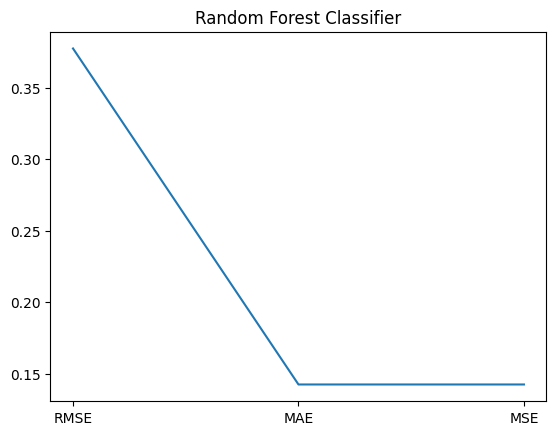

In [199]:
plt.plot(('RMSE', 'MAE', 'MSE'),s1)
plt.title('Random Forest Classifier')

Text(0.5, 1.0, 'Logistical Regression')

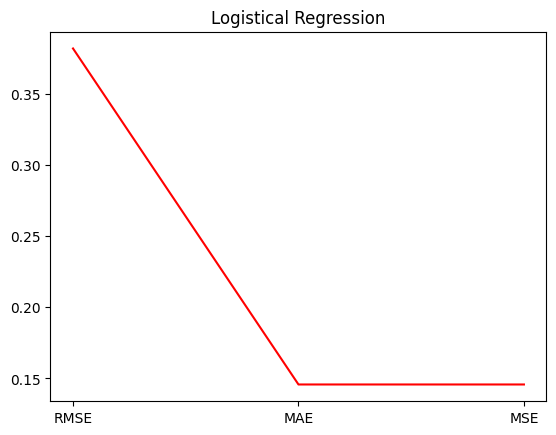

In [200]:
plt.plot(('RMSE', 'MAE', 'MSE'),s2, color='red')
plt.title('Logistical Regression')

Text(0.5, 1.0, 'Adaptive Classifier')

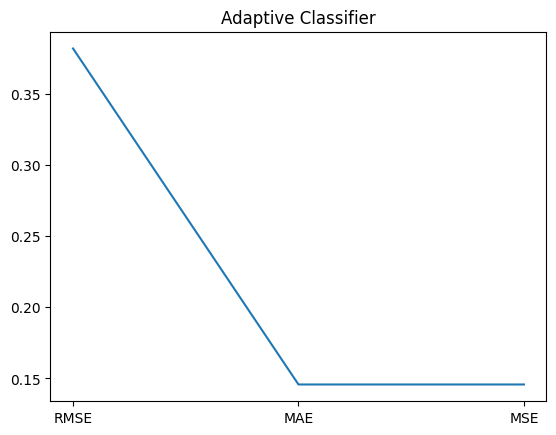

In [201]:
plt.plot(('RMSE', 'MAE', 'MSE'),s3)
plt.title('Adaptive Classifier')

Text(0.5, 1.0, 'CatBoost Classifier')

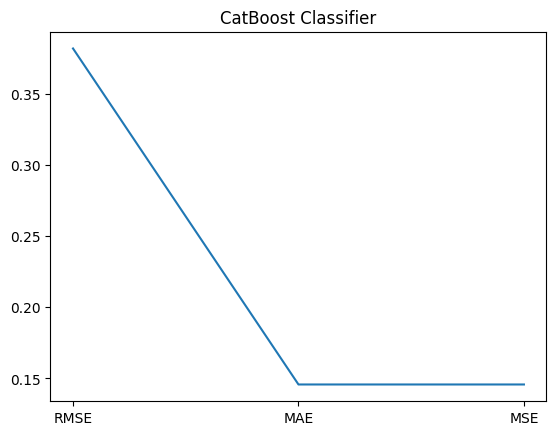

In [202]:
plt.plot(('RMSE', 'MAE', 'MSE'),s4)
plt.title('CatBoost Classifier')

Text(0.5, 1.0, 'Model Accuracy')

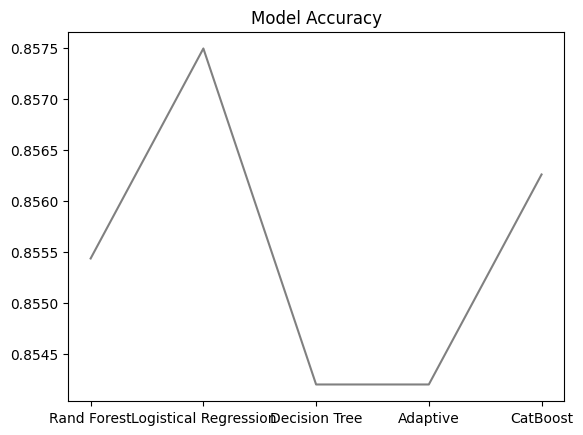

In [203]:
plt.plot(('Rand Forest', 'Logistical Regression', 'Decision Tree', 'Adaptive', 'CatBoost'),(model.score(X_test,y_test), model1.score(X_test,y_test), model2.score(X_test,y_test), model3.score(X_test,y_test), model4.score(X_test,y_test)),color='grey')
plt.title("Model Accuracy")

We can clearly see that the model using logistical regression performs slightly better than others.

#Comprehensive Model Evaluation

In [204]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

    # Calculating Metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display Metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plotting Precision-Recall Curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(recall_vals, precision_vals, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Plotting ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    # Plotting Confusion Matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


Random Forest Classifier:
Accuracy: 0.86
ROC-AUC: 0.55
Precision: 0.40
Recall: 0.01
F1-Score: 0.01

Confusion Matrix:
[[2075    3]
 [ 348    2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2078
           1       0.40      0.01      0.01       350

    accuracy                           0.86      2428
   macro avg       0.63      0.50      0.47      2428
weighted avg       0.79      0.86      0.79      2428



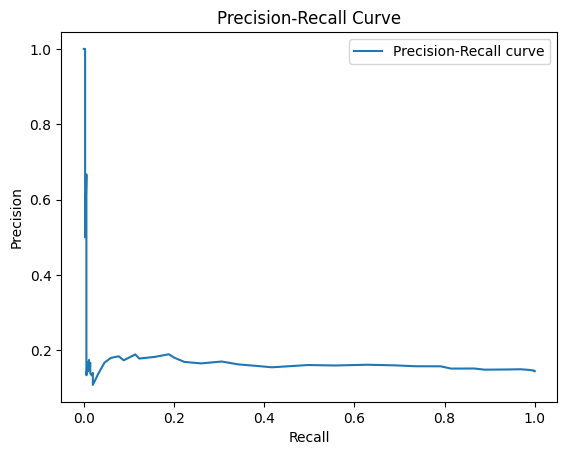

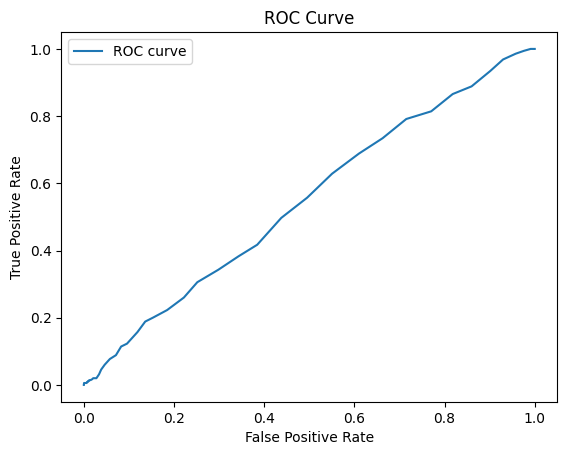

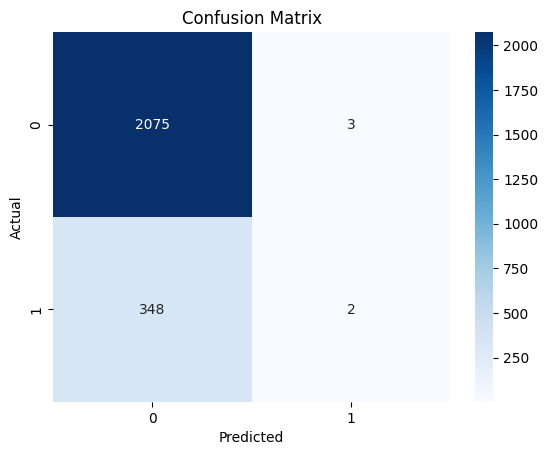

In [205]:
# Random Forest Classifier
print("Random Forest Classifier:")
evaluate_model(model, X_test, y_test)

Logistic Regression:
Accuracy: 0.86
ROC-AUC: 0.55
Precision: 1.00
Recall: 0.01
F1-Score: 0.02

Confusion Matrix:
[[2078    0]
 [ 346    4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2078
           1       1.00      0.01      0.02       350

    accuracy                           0.86      2428
   macro avg       0.93      0.51      0.47      2428
weighted avg       0.88      0.86      0.79      2428



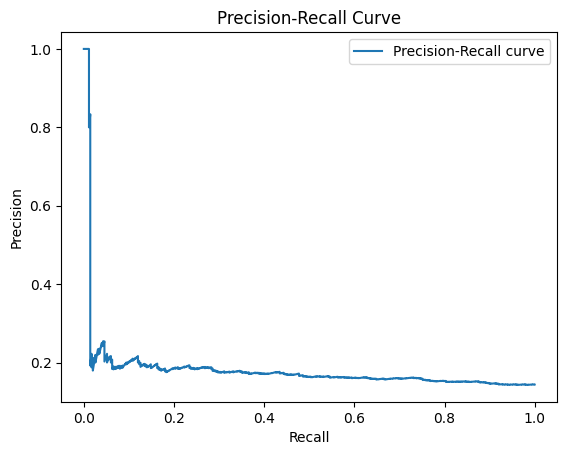

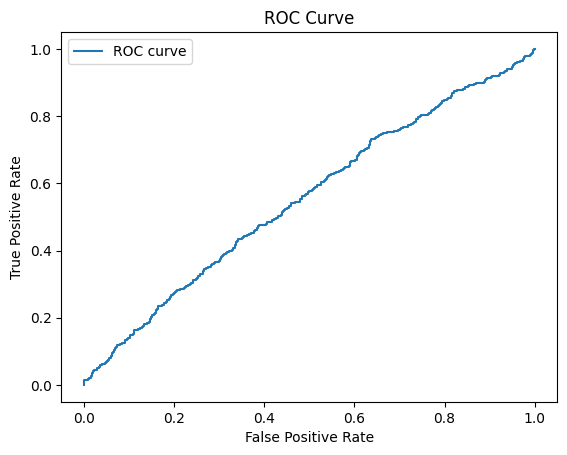

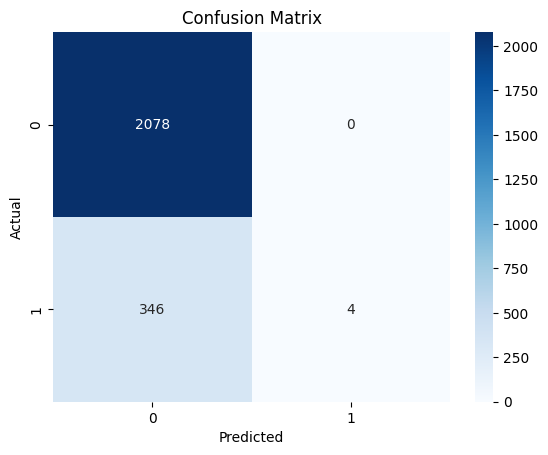

In [206]:
# Logistic Regression
print("Logistic Regression:")
evaluate_model(model1, X_test, y_test)

Decision Tree Classifier:
Accuracy: 0.85
ROC-AUC: 0.57
Precision: 0.25
Recall: 0.01
F1-Score: 0.01

Confusion Matrix:
[[2072    6]
 [ 348    2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2078
           1       0.25      0.01      0.01       350

    accuracy                           0.85      2428
   macro avg       0.55      0.50      0.47      2428
weighted avg       0.77      0.85      0.79      2428



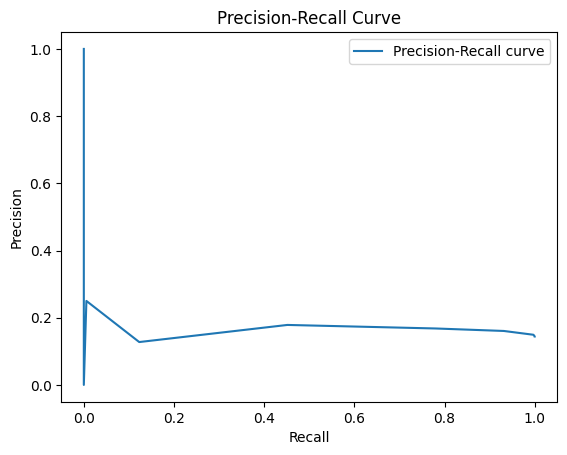

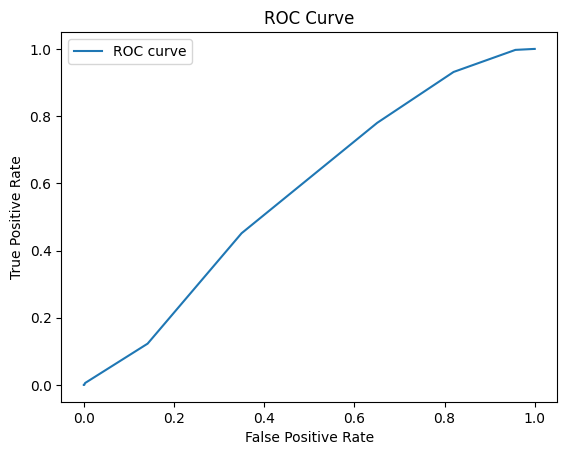

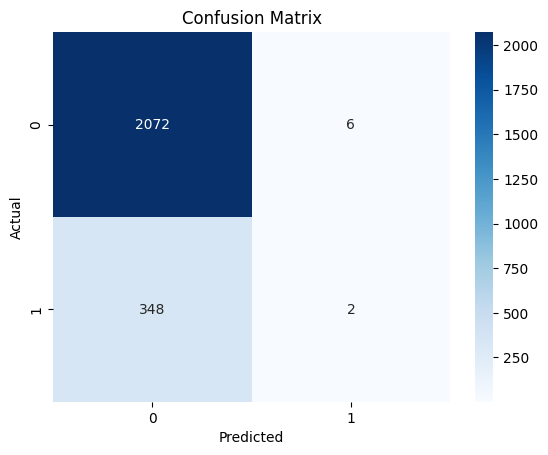

In [207]:
# Decision Tree Classifier
print("Decision Tree Classifier:")
evaluate_model(model2, X_test, y_test)

AdaBoost Classifier:
Accuracy: 0.85
ROC-AUC: 0.57
Precision: 0.00
Recall: 0.00
F1-Score: 0.00

Confusion Matrix:
[[2074    4]
 [ 350    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2078
           1       0.00      0.00      0.00       350

    accuracy                           0.85      2428
   macro avg       0.43      0.50      0.46      2428
weighted avg       0.73      0.85      0.79      2428



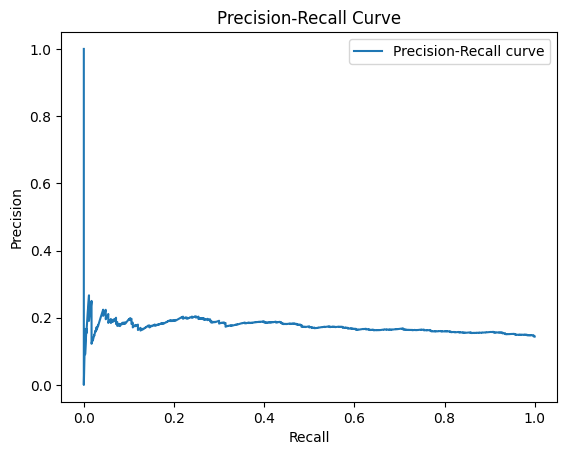

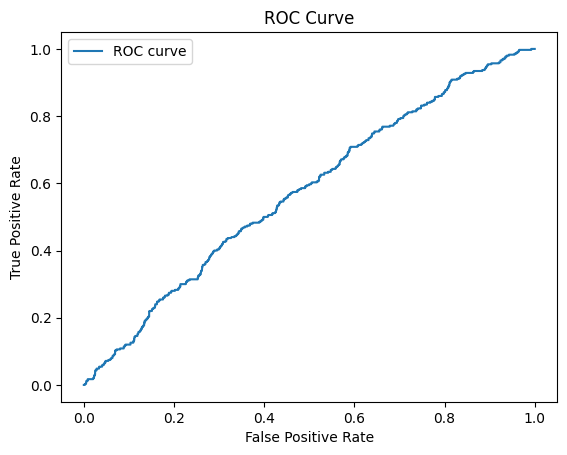

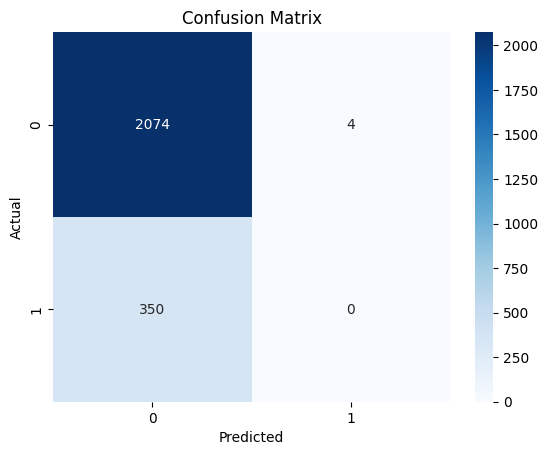

In [208]:
# AdaBoost Classifier
print("AdaBoost Classifier:")
evaluate_model(model3, X_test, y_test)

CatBoost Classifier:
Accuracy: 0.86
ROC-AUC: 0.56
Precision: 1.00
Recall: 0.00
F1-Score: 0.01

Confusion Matrix:
[[2078    0]
 [ 349    1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2078
           1       1.00      0.00      0.01       350

    accuracy                           0.86      2428
   macro avg       0.93      0.50      0.46      2428
weighted avg       0.88      0.86      0.79      2428



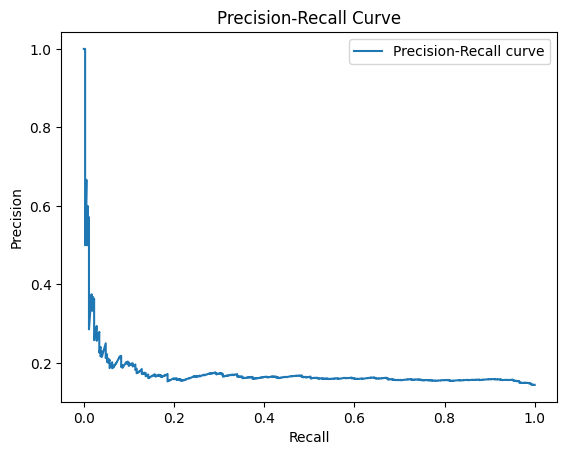

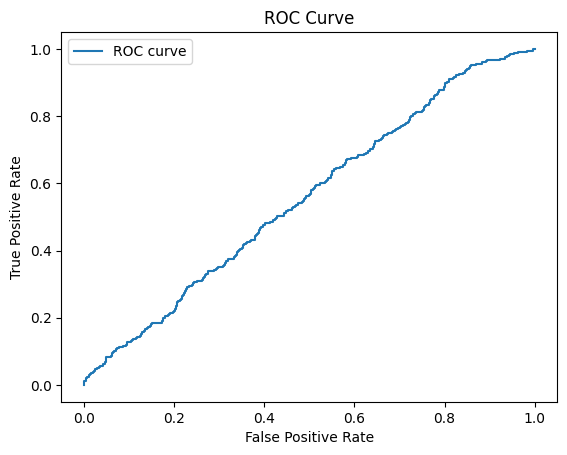

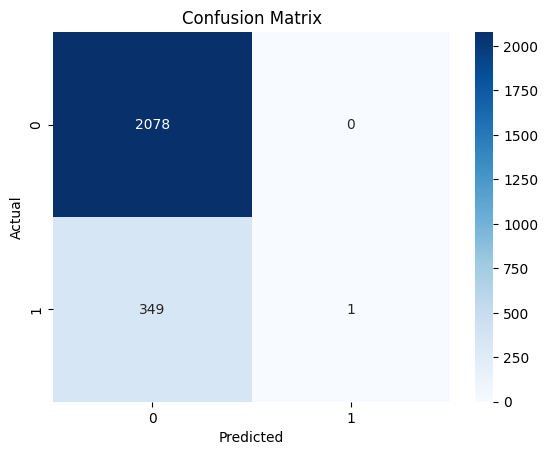

In [209]:
# CatBoost Classifier
print("CatBoost Classifier:")
evaluate_model(model4, X_test, y_test)